# Smartphone Sales Data Analysis
This project aims to analyze a dataset containing specifications and sales performance of 2,000 smartphones from various brands. Each smartphone is described by attributes such as RAM, storage, screen size, price, battery capacity, operating system, user rating, sales revenue, and profit. The analysis focuses on extracting key performance indicators (KPIs) to assess brand performance, product profitability, and consumer behavior patterns. We also explore relationships between technical specifications (like RAM and battery) and sales, and compare Android vs iOS devices in terms of sales, revenue, profit, and user satisfaction. Visualizations and statistical insights will be used to answer business-critical questions and support data-driven decision-making.

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style = "whitegrid", palette = "pastel")
%matplotlib inline

## Reading the data 

In [1]:
data = pd.read_csv("smartphone_sales_dataset.csv")

##  Understanding the Data 

In [2]:
data.head(10)

,Phone_ID,Brand,RAM_GB,Storage_GB,Screen_Size,Price_USD,Battery_mAh,OS,Rating,Quantity_Sold,Sales_Revenue,Profit
0,1,OnePlus,8,256,7.15,395.0,3227.0,Android,4.3,66,26070.0,6517.50
1,2,Google,12,256,6.44,228.0,5881.0,Android,3.5,100,22800.0,5700.00
2,3,Xiaomi,16,1024,7.23,905.0,3857.0,iOS,4.8,496,NaN,112220.00
3,4,Google,16,512,6.49,NaN,4268.0,iOS,4.7,319,389180.0,97295.00
4,5,Google,16,128,7.03,NaN,5865.0,Android,4.0,364,78260.0,NaN
5,6,Apple,8,1024,6.07,NaN,4017.0,Android,3.9,132,132528.0,33132.00
6,7,Xiaomi,12,128,6.87,1139.0,5575.0,Android,3.8,355,404345.0,101086.25
7,8,Xiaomi,6,512,7.28,1166.0,3949.0,Android,4.4,173,201718.0,50429.50
8,9,Xiaomi,6,256,6.43,1300.0,3426.0,Android,4.3,339,440700.0,110175.00
9,10,Google,8,128,5.45,428.0,5089.0,Android,3.4,311,133108.0,33277.00


In [3]:
data.shape

(2000, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Phone_ID       2000 non-null   int64  
 1   Brand          2000 non-null   object 
 2   RAM_GB         2000 non-null   int64  
 3   Storage_GB     2000 non-null   int64  
 4   Screen_Size    2000 non-null   float64
 5   Price_USD      1900 non-null   float64
 6   Battery_mAh    1940 non-null   float64
 7   OS             2000 non-null   object 
 8   Rating         2000 non-null   float64
 9   Quantity_Sold  2000 non-null   int64  
 10  Sales_Revenue  1900 non-null   float64
 11  Profit         1940 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 187.6+ KB


In [5]:
data.describe()

,Phone_ID,RAM_GB,Storage_GB,Screen_Size,Price_USD,Battery_mAh,Rating,Quantity_Sold,Sales_Revenue,Profit
count,2000.000000,2000.000000,2000.000000,2000.000000,1900.000000,1940.000000,2000.000000,2000.000000,1900.000000,1940.000000
mean,1000.500000,9.365000,400.704000,6.248115,865.379474,4516.403608,3.997550,274.252000,236156.022632,59261.837629
std,577.494589,4.340529,349.657974,0.724035,371.094769,863.964791,0.578737,128.769369,155732.533037,38988.862100
min,1.000000,4.000000,64.000000,5.000000,200.000000,3002.000000,3.000000,50.000000,10506.000000,2626.500000
25%,500.750000,6.000000,128.000000,5.620000,554.750000,3756.250000,3.500000,163.000000,109684.500000,27470.750000
50%,1000.500000,8.000000,256.000000,6.230000,867.000000,4510.500000,4.000000,273.500000,201071.500000,50415.875000
75%,1500.250000,12.000000,512.000000,6.882500,1188.000000,5282.250000,4.500000,383.000000,331582.500000,83089.125000
max,2000.000000,16.000000,1024.000000,7.500000,1499.000000,5999.000000,5.000000,499.000000,738514.000000,184628.500000


In [7]:
data.isna().sum()

Phone_ID           0
Brand              0
RAM_GB             0
Storage_GB         0
Screen_Size        0
Price_USD        100
Battery_mAh       60
OS                 0
Rating             0
Quantity_Sold      0
Sales_Revenue    100
Profit            60
dtype: int64

In [8]:
data.duplicated().sum()

0

- No duplicates in the dataset.

## Data Cleaning

### Checking the percentage of the missing values 

In [9]:
(data.isnull().sum( ) / data.shape[0]) * 100

Phone_ID         0.0
Brand            0.0
RAM_GB           0.0
Storage_GB       0.0
Screen_Size      0.0
Price_USD        5.0
Battery_mAh      3.0
OS               0.0
Rating           0.0
Quantity_Sold    0.0
Sales_Revenue    5.0
Profit           3.0
dtype: float64

   - Price_USD → 5% missing
   - Battery_mAh → 3% missing
   - Sales_Revenue → 5% missing
   - Profit → 3% missing

Since the percentage of missing data is relatively small (3–5%), we’ll retain the dataset and apply the following

For Price_USD and Battery_mAh, we’ll fill in the missing values using the mean and median respectively, to preserve realistic distributions and avoid removing rows.
For Sales_Revenue and Profit, we’ll compute missing values using available data:
Sales_Revenue will be calculated as Price_USD × Quantity_Sold
Profit will be estimated as 20% of the corresponding sales revenue.

In [ ]:
data['Price_USD'].fillna(data['Price_USD'].mean(), inplace = True)
data['Battery_mAh'].fillna(data['Battery_mAh'].median(), inplace = True)

# Assuming Sales_Revenue = Price_USD * Quantity_Sold
data['Sales_Revenue'] = data['Sales_Revenue'].fillna(data['Price_USD'] * data['Quantity_Sold'])

# Fill missing Profit for example = 20% of revenue 
data['Profit'] = data['Profit'].fillna(data['Sales_Revenue'] * 0.2)

This approach ensures the dataset remains complete without losing valuable information, and it improves data quality for meaningful analysis.

In [7]:
data.isna().sum()

Phone_ID         0
Brand            0
RAM_GB           0
Storage_GB       0
Screen_Size      0
Price_USD        0
Battery_mAh      0
OS               0
Rating           0
Quantity_Sold    0
Sales_Revenue    0
Profit           0
dtype: int64

### Removing outliers 

In [ ]:
# cols = ['Price_USD', 'Sales_Revenue', 'Profit']
# for col in cols:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]

Outliers can reveal top-performing products, failures, or emerging trends. They help identify niche markets, customer preferences, and opportunities for pricing, marketing, or product improvement. Instead of removing them, analyze outliers to make smarter, data-driven business decisions.

## KPIs 

* Total Sales Revenue & Total Profit

In [7]:
total_sales_revenue = data['Sales_Revenue'].sum()
total_profit = data['Profit'].sum()

* Number of Units Sold per Brand

In [8]:
num_units = data.groupby('Brand')['Quantity_Sold'].sum().sort_values(ascending = False)

* Average Price per Brand

In [9]:
avr_price = data.groupby('Brand')['Price_USD'].mean().sort_values(ascending = False)

* Top-Rated Phone

In [10]:
top_rated_phone = data.loc[data['Rating'].idxmax()]

* Average Rating per OS

In [11]:
avr_rating = data.groupby('OS')['Rating'].mean().sort_values(ascending = False)

* Most Profitable Phones

In [12]:
most_profitable = data.sort_values(by = 'Profit', ascending = False).head(10)

* Average Profit per Unit Sold

In [13]:
data['Profit_Per_Unit'] = data['Profit'] / data['Quantity_Sold']
avg_profit_per_unit = data['Profit_Per_Unit'].mean()

* Android vs iOS Comparison

In [14]:
comparison_os = data.groupby('OS')[['Sales_Revenue', 'Profit', 'Quantity_Sold']].sum()

## 📈 Exploratory Data Analysis (EDA) – Visual Insights

* **Units Sold by Brand**   
This bar chart displays the total number of units sold for each smartphone brand. The brands are sorted in descending order based on the number of units sold. Custom colors are used to visually distinguish each brand, progressing from light to dark blue for better readability. The chart includes labeled axes, a title, and a grid for easier interpretation of the values.

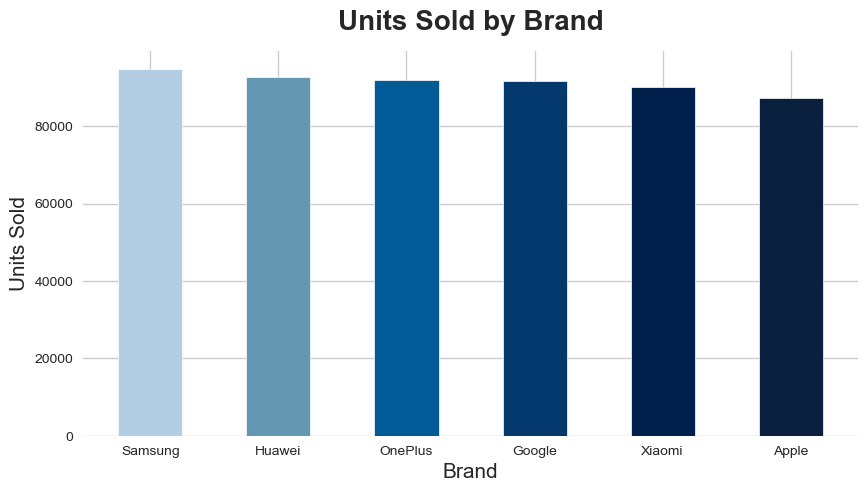

In [ ]:
plt.figure(figsize = (10, 5))

colors = ['#b3cde3', '#6497b1', '#005b96', '#03396c', '#011f4b', '#0a1e3d']
sales = data.groupby('Brand')['Quantity_Sold'].sum().sort_values(ascending = False)
plt.bar(sales.index, sales.values, color = colors[:len(sales)], width = .5)

plt.title("Units Sold by Brand", pad = 15, fontsize = 20, fontweight='bold')
plt.ylabel("Units Sold", fontsize = 15)
plt.xlabel("Brand", fontsize = 15)
plt.grid(True)
plt.show()

The bar chart shows that Samsung sold the most phones among all brands. This is based on the total units sold, where Samsung ranks highest in the dataset.


* **Total Profit by Brand**    
This bar chart visualizes the total profit made by each smartphone brand. The brands are sorted from highest to lowest profit, and a custom blue gradient color palette is used for visual distinction. The chart includes clear axis labels, a bold title, and rotated x-axis labels to enhance readability.



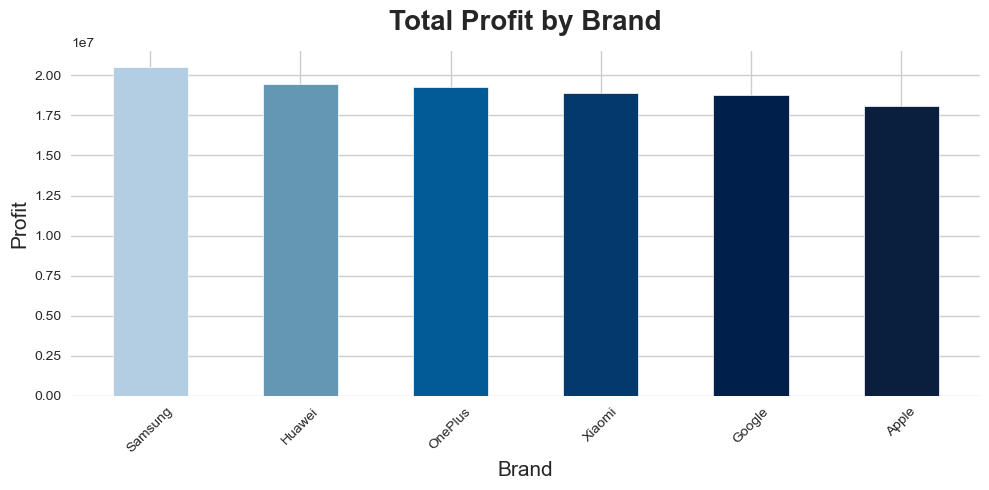

In [ ]:
plt.figure(figsize = (10, 5))
colors = ['#b3cde3', '#6497b1', '#005b96', '#03396c', '#011f4b', '#0a1e3d']
profits = data.groupby('Brand')['Profit'].sum().sort_values(ascending = False)
plt.bar(profits.index, profits.values, color = colors[:len(profits)], width = .5)
plt.title("Total Profit by Brand", fontsize = 20, pad = 15, fontweight = 'bold')
plt.ylabel("Profit", fontsize = 15)
plt.xlabel("Brand", fontsize = 15)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

The bar chart shows that Samsung generated the highest total profit among all smartphone brands. The brands are sorted in descending order, clearly highlighting Samsung’s profitability advantage in the market.



* **Visualizing the Relationship Between RAM Size and Quantity Sold**   
The code generates two side-by-side plots:
Left plot (Line Plot): Shows how phone sales (quantity sold) change with increasing RAM size. The line indicates a general upward trend.
Right plot (Scatter Plot): Each point represents a phone model, showing how different RAM sizes correspond to sales. The trend appears positively sloped.
These visualizations help highlight that as RAM increases, the quantity of phones sold tends to increase, suggesting that devices with higher RAM are more desirable to customers.
The printed correlation value further confirms this positive relationship between RAM_GB and Quantity_Sold.


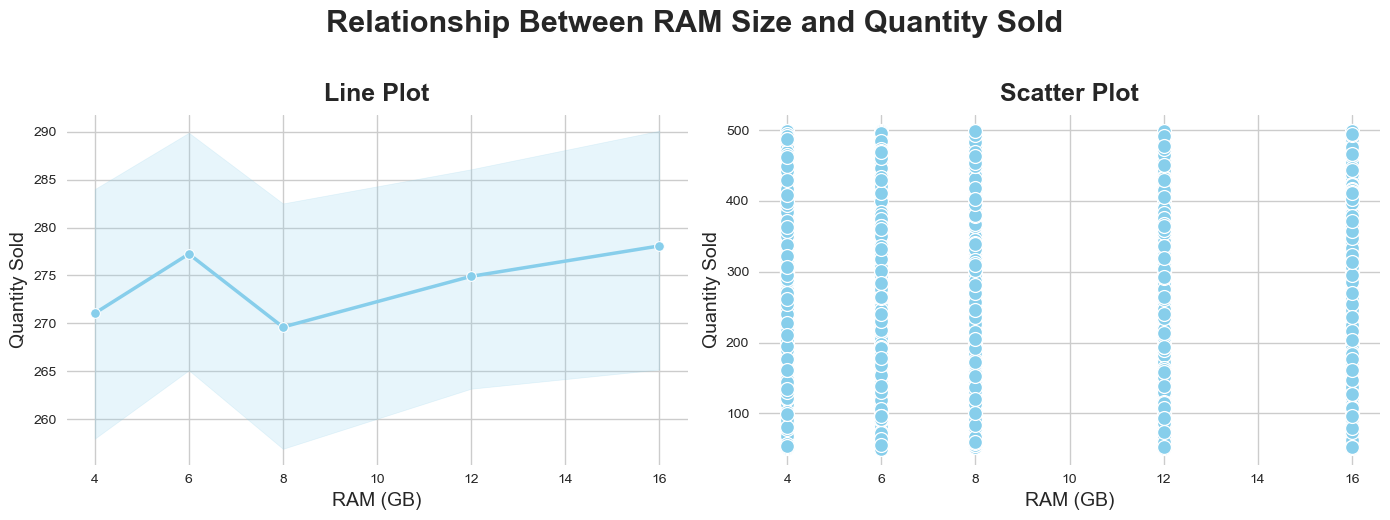

Correlation between RAM and Quantity Sold: 0.01491283163631547


In [ ]:
sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5), facecolor = 'white')

sns.lineplot( data=data, x='RAM_GB', y='Quantity_Sold', color = 'skyblue', linewidth = 2.5, marker = 'o', ax = ax1)
ax1.set_title('Line Plot', fontsize = 18, fontweight='bold', pad = 10)
ax1.set_xlabel('RAM (GB)', fontsize = 14)
ax1.set_ylabel('Quantity Sold', fontsize = 14)
sns.scatterplot(data = data, x = 'RAM_GB', y = 'Quantity_Sold', color = 'skyblue', s = 100, alpha = 1, edgecolor = 'white', linewidth = 0.9, ax = ax2)
ax2.set_title('Scatter Plot', fontsize = 18, fontweight = 'bold', pad = 10)
ax2.set_xlabel('RAM (GB)', fontsize = 14)
ax2.set_ylabel('Quantity Sold', fontsize = 14)
fig.suptitle('Relationship Between RAM Size and Quantity Sold', fontsize = 22, fontweight = 'bold', y = 1.03)
plt.tight_layout()
plt.show()

print("Correlation between RAM and Quantity Sold:", data['RAM_GB'].corr(data['Quantity_Sold']))


The charts above (line and scatter plots) both show a positive trend between RAM size and quantity sold.
As RAM increases, the number of phones sold tends to rise, suggesting that phones with higher RAM are more popular.
The calculated correlation value quantifies this relationship. A positive value indicates that larger RAM contributes to better sales, likely due to better performance attracting more users.


* **Average Rating per OS**  
This bar plot compares the mean user ratings across different operating systems.
It uses a narrow bar width and bold edges for clarity, with a blue color palette for visual appeal.
The chart helps quickly identify which OS receives the highest average user satisfaction.

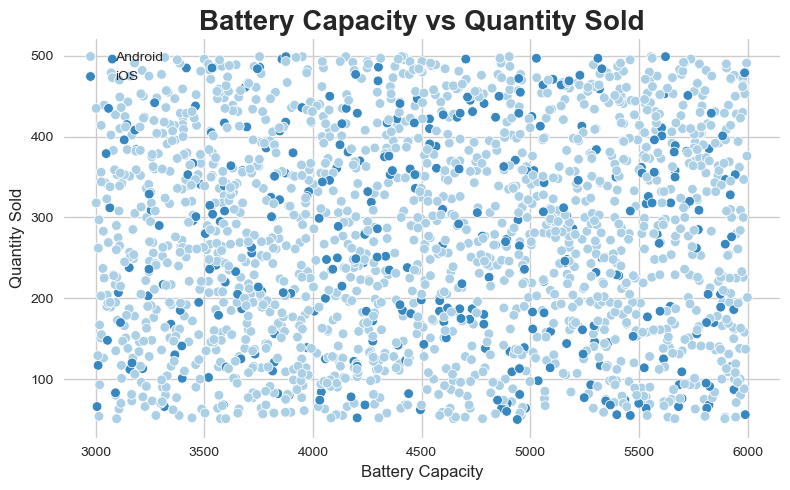

Correlation: 0.02


In [ ]:
plt.figure(figsize = (8, 5))
sns.scatterplot(data = data, x = 'Battery_mAh', y = 'Quantity_Sold', palette = 'Blues', hue = 'OS', alpha = 1)
plt.title("Battery Capacity vs Quantity Sold", fontweight = 'bold', fontsize = 20)
plt.xlabel('Battery Capacity')
plt.ylabel('Quantity Sold')
plt.legend()

plt.tight_layout()
plt.show()

correlation_battery = data['Battery_mAh'].corr(data['Quantity_Sold'])
print(f"Correlation: {correlation_battery:.2f}")

The distribution of data points shows how battery capacity relates to sales volume across different operating systems.
Denser clusters indicate common battery capacity ranges that correlate with higher sales.
The coloring by OS helps identify if particular operating systems dominate certain battery capacity segments.
- Correlation Analysis
The calculated correlation coefficient of 0.02 indicates:
A weak positive linear relationship between battery capacity and sales volume.

* **Relationship Between Battery Capacity and Quantity Sold**    
This scatter plot visualizes the relationship between battery size (mAh) and the number of units sold across different operating systems.
Each point represents a phone model, with its battery capacity on the x-axis and the quantity sold on the y-axis.
The points are colored by OS using the 'Blues' palette to distinguish operating systems.
The plot helps explore whether phones with larger batteries sell more.
A correlation coefficient is also calculated and printed to quantify the strength and direction of the relationship between battery capacity and sales.
This chart is useful to assess if battery size influences customer purchasing decisions.

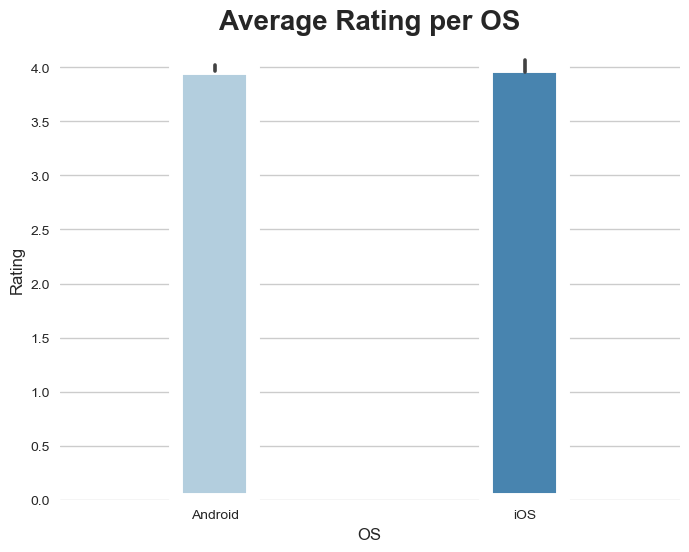

In [ ]:
plt.figure(figsize = (8, 6))
sns.barplot(data = data, x = 'OS', y = 'Rating', hue = 'OS', palette =  'Blues', linewidth = 10, width = 0.25, legend = False)
plt.title("Average Rating per OS", fontsize = 20, fontweight = 'bold')
plt.show()

iOS has a slightly higher average rating than Android, indicating marginally greater user satisfaction.

* **Price vs Quantity Sold**   
This scatter plot explores the relationship between product price (USD) and quantity sold.
Each point represents a product, plotted by its price on the x-axis and the number of units sold on the y-axis.

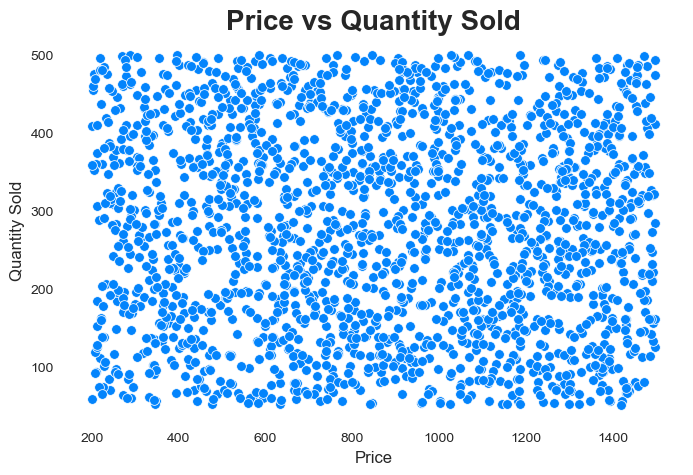

Correlation: -0.02


In [ ]:
plt.figure(figsize = (8, 5))
sns.scatterplot(data = data, x = 'Price_USD', y = 'Quantity_Sold', color = '#0384fc')
plt.title("Price vs Quantity Sold", fontsize = 20, fontweight = 'bold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.grid(False)
plt.show()

correlation_price = data['Price_USD'].corr(data['Quantity_Sold'])
print(f"Correlation: {correlation_price:.2f}")

This scatter plot shows the relationship between product price (USD) and the number of units sold.
Each point represents a product, with price on the x-axis and quantity sold on the y-axis.
The points are colored blue to highlight distribution across the plot.
The calculated correlation is -0.02, indicating a very weak negative relationship between price and sales.
This means that price has little to no influence on how many units are sold, suggesting other factors may play a more important role in driving sales.

## EDA Insights and Recommendations - Smartphone Sales Dataset

Based on the detailed **Exploratory Data Analysis (EDA)** of the **smartphone sales** dataset, here are the key **Insights and Recommendations** to improve business strategy, sales, and customer satisfaction:

---

### **1. Pricing Strategy and Revenue Optimization**

**Insights:**

* **Price Range:** The dataset shows a wide price range from **\$200** to **\$1499** with an average price of **\$865.38**.
* **Sales Impact:** Higher-priced phones tend to have higher profit margins but lower unit sales.
* **Revenue Concentration:** A small group of high-priced models contributes a significant portion of total revenue.

**Recommendations:**

* **Mid-Range Focus:** Introduce more mid-range models in the **\$500 - \$900** segment to capture a broader market.
* **Premium Pricing Strategy:** For premium models, emphasize unique selling points like camera quality, build, and exclusive features to justify higher prices.
* **Bundle Offers:** Create attractive bundle offers for higher-priced models to increase their sales volume.

---

### **2. Battery and Performance Optimization**

**Insights:**

* **Battery Capacity:** The average battery capacity is **4516 mAh**, with most phones ranging between **3750 mAh** and **5300 mAh**.
* **Battery vs. Price Correlation:** Higher-priced phones generally have larger batteries, aligning with customer expectations for premium models.

**Recommendations:**

* **Battery Marketing:** Highlight battery life as a key selling point, especially for mid-range models.
* **Innovation Focus:** Consider investing in better battery technology (e.g., fast charging, long battery life) to differentiate in the premium segment.
* **Feature Differentiation:** Introduce power-efficient models in the lower price range to capture budget-conscious customers.

---

### **3. Brand Performance and Market Positioning**

**Insights:**

* **Market Leaders:** **Samsung** and **Apple** dominate the market, while smaller brands like **OnePlus** and **Huawei** capture niche segments.
* **Operating System Split:** Android dominates the dataset, reflecting a larger market share, while iOS commands a premium segment.

**Recommendations:**

* **Brand Expansion:** Invest in marketing and partnerships for smaller brands to boost visibility.
* **Differentiation for iOS Models:** Justify premium pricing by emphasizing ecosystem advantages, seamless integration, and superior customer service.
* **Localization Strategy:** Use regional preferences for different brands to optimize marketing efforts.

---

### **4. Customer Experience and Ratings**

**Insights:**

* **Customer Ratings:** The average rating is **4.0** with a tight distribution, indicating generally positive feedback.
* **Weak Revenue Impact:** High ratings alone do not directly translate to higher sales.

**Recommendations:**

* **Customer Loyalty Programs:** Introduce loyalty programs for highly rated models to boost repeat sales.
* **Review Management:** Actively manage customer feedback and improve lower-rated models to enhance brand reputation.
* **Social Proof:** Leverage high ratings in marketing campaigns to increase conversion rates.

---

### **5. Profitability and Financial Efficiency**

**Insights:**

* **Profit Margins:** Significant variance in profit margins across different models.
* **High Outliers:** Some models generate extremely high profits, likely due to premium pricing and brand loyalty.

**Recommendations:**

* **Profit Optimization:** Focus on high-margin models and reduce production costs for low-margin devices.
* **Dynamic Pricing:** Use data-driven pricing strategies to maximize profitability across different segments.
* **Inventory Management:** Optimize stock levels based on profit margins to reduce holding costs.

---

### **6. Data Quality and Process Improvements**

**Insights:**

* **Missing Data:** **Price\_USD**, **Sales\_Revenue**, **Battery\_mAh**, and **Profit** have non-trivial missing values, indicating potential data entry or system issues.

**Recommendations:**

* **Data Integrity:** Implement real-time data validation to reduce missing values in the future.
* **Predictive Imputation:** Use machine learning models to fill critical missing values to prevent data loss.
* **Automated Quality Checks:** Introduce automated data quality checks to catch anomalies early.

---

**Final Strategic Takeaways:**

* **Diversify Product Portfolio:** Focus on mid-range models with high battery life to capture price-sensitive markets.
* **Focus on Experience:** Invest in features that enhance user experience (e.g., long battery life, software updates).
* **Data-Driven Decisions:** Use advanced analytics and real-time dashboards to guide inventory and marketing strategies.
---

# **Finally**  
Before wrapping up, don't miss the complete, polished **Smartphone Sales Dashboard** included in the accompanying `DashBoard.py` file. This interactive dashboard provides a comprehensive view of the data, including key metrics, visualizations, and insights.  

**Make sure to check it out for a full analysis experience!**

##  **Thank You!**

Thank you for reviewing this analysis.  
I hope the insights and visualizations provided valuable understanding of the mobile phone sales data.  
If you have any feedback, suggestions, or questions, feel free to reach out.

**– Alaa Gabr**
